In [154]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load Data

In [155]:
data = pd.read_csv("credit_card_clustering.csv")

In [156]:
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


# Exploratory Data Analysis

### How many rows/columns are there?

In [157]:
data.shape

(8950, 18)

### How many customers are there?

In [158]:
data['CUST_ID'].nunique()

8950

This means, we have 8950 unique customer IDs

In [159]:
data.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [160]:
data.dtypes

CUST_ID                              object
BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object

### Distribution of Balances of Credit Card Holders

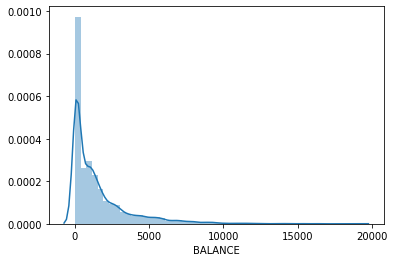

In [161]:
sns.distplot(data['BALANCE'])

Balance distribution is skewed to the right. Most credit holders have very low balances left in their accounts.

#### Quick data prep of Credit Limit variable

In [162]:
data['CREDIT_LIMIT'].isna().sum()

1

In [163]:
data['CREDIT_LIMIT']=data['CREDIT_LIMIT'].fillna(0)

In [164]:
data['CREDIT_LIMIT'].isna().sum()

0

### Credit Limit distribution of credit card holders

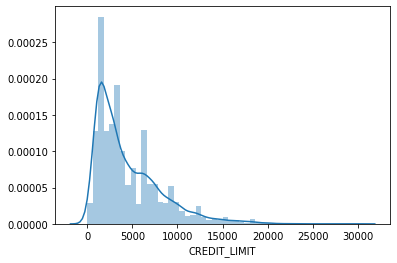

In [166]:
sns.distplot(data['CREDIT_LIMIT'])

Credit limit distribution is also skewed to the right.  

### Descriptive Statistics

In [167]:
data['BALANCE'].describe(np.arange(0.1, 1, 0.1))

count     8950.000000
mean      1564.474828
std       2081.531879
min          0.000000
10%         23.575529
20%         77.238026
30%        207.176552
40%        467.021989
50%        873.385231
60%       1207.815587
70%       1698.588855
80%       2571.434263
90%       4338.563657
max      19043.138560
Name: BALANCE, dtype: float64

In [180]:
data['CREDIT_LIMIT'].describe(np.arange(0.1, 1, 0.1))

count     8950.000000
mean      4493.947277
std       3638.922543
min          0.000000
10%       1200.000000
20%       1500.000000
30%       2000.000000
40%       2500.000000
50%       3000.000000
60%       4200.000000
70%       6000.000000
80%       7000.000000
90%       9500.000000
max      30000.000000
Name: CREDIT_LIMIT, dtype: float64

In [181]:
data['PURCHASES'].describe(np.arange(0.1, 1, 0.1))

count     8950.000000
mean      1003.204834
std       2136.634782
min          0.000000
10%          0.000000
20%          0.000000
30%         89.285000
40%        212.850000
50%        361.280000
60%        557.546000
70%        894.316000
80%       1422.438000
90%       2542.624000
max      49039.570000
Name: PURCHASES, dtype: float64

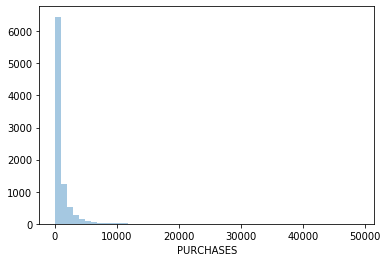

In [169]:
sns.distplot(data['PURCHASES'], kde=False)

Visually, it seems majority of credit card holders purchased cheap items.

# Clustering

In [170]:
from sklearn.cluster import KMeans

In [171]:
# Select only 3 features from credit card dataset
features = ['BALANCE', 'CREDIT_LIMIT', 'PURCHASES']
X = data[features]

# Convert categorical to numeric
# X = pd.get_dummies(X_temp)


X.head()

,BALANCE,CREDIT_LIMIT,PURCHASES
0,40.900749,1000.0,95.40
1,3202.467416,7000.0,0.00
2,2495.148862,7500.0,773.17
3,1666.670542,7500.0,1499.00
4,817.714335,1200.0,16.00


In [14]:
!pip install hvplot

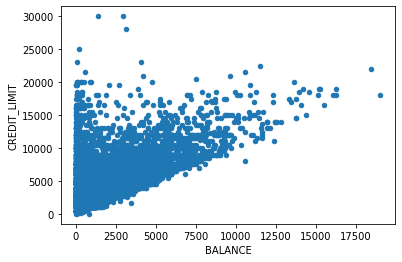

In [172]:
# If you have 2 features, you can plot it on a 2D scatter plot
X.plot.scatter('BALANCE', 'CREDIT_LIMIT')

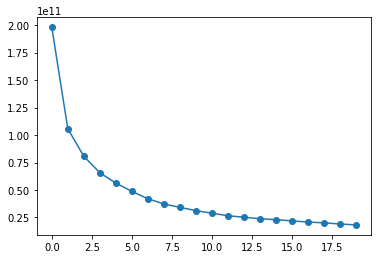

In [173]:
# get the sum of squared errors and find where the reduction of the errors are saturated with the increase of k
squared_errors = []

for num_iter in range(1,21):
  km = KMeans(n_clusters=num_iter, random_state=42)
  km.fit(X)
  squared_errors.append(km.inertia_)

# check for the best k to use
plt.plot(squared_errors, marker = 'o')

Using the elbow method, I decided to use k=3.

In [174]:
# Clustering using KMeans. We choose 6 clusters
km = KMeans(n_clusters = 3, random_state = 42)

# Fit data to model
km.fit(X)

# Get labels
labels = km.predict(X)

# Create new dataframe with features and labels
new_data = X.copy()

# Add labels to new_data dataframe
new_data['labels'] = labels

In [175]:
new_data.head()

,BALANCE,CREDIT_LIMIT,PURCHASES,labels
0,40.900749,1000.0,95.40,1
1,3202.467416,7000.0,0.00,2
2,2495.148862,7500.0,773.17,2
3,1666.670542,7500.0,1499.00,2
4,817.714335,1200.0,16.00,1


### Plot Centers and labels

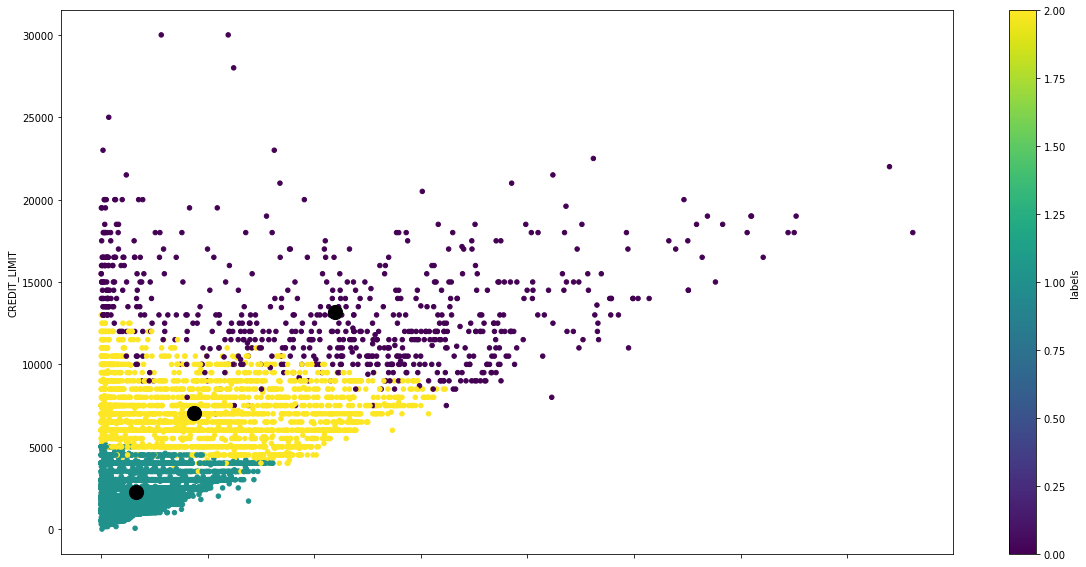

In [176]:
# Plot data points and colorize based on label
new_data.plot.scatter(x='BALANCE', 
                      y='CREDIT_LIMIT', 
                      c='labels', 
                      cmap='viridis',
                      figsize=(20, 10))
# new_data.plot.scatter(y='Gender_Female', 
#                       x='Spending Score (1-100)', 
#                       c='labels', 
#                       cmap='viridis',
#                       figsize=(20, 10))


# Get cluster centers
centers = km.cluster_centers_
plt.scatter(centers[:,0],centers[:,1], s=200, color='black')

# Deep Dive to each cluster

In [177]:
# Cluster 0
cluster_0 = new_data[new_data['labels']==0]
cluster_0.describe()

,BALANCE,CREDIT_LIMIT,PURCHASES,labels
count,674.000000,674.000000,674.000000,674.0
mean,5496.363646,13191.765579,3672.835682,0.0
std,3778.987156,3198.420115,5863.798037,0.0
min,1.019189,7000.000000,0.000000,0.0
25%,2399.091611,11000.000000,238.650000,0.0
50%,5651.331110,12500.000000,1490.845000,0.0
75%,8066.798097,15000.000000,4649.542500,0.0
max,19043.138560,30000.000000,49039.570000,0.0


Cluster 0: High Balance, High Credit Limit, Highest Amount of Purchases
            "Millionaire Graduates"

In [178]:
# Cluster 1 
cluster_1 = new_data[new_data['labels']==1]
cluster_1.describe()

,BALANCE,CREDIT_LIMIT,PURCHASES,labels
count,5619.000000,5619.000000,5619.000000,5619.0
mean,805.149262,2246.696427,548.031605,1.0
std,830.553765,1112.404833,809.963856,0.0
min,0.000000,0.000000,0.000000,1.0
25%,72.780617,1200.000000,14.990000,1.0
50%,545.767741,2000.000000,258.900000,1.0
75%,1281.923575,3000.000000,699.980000,1.0
max,4028.036480,5100.000000,8591.310000,1.0


Cluster 1: Low Balance, Low Credit Limit, Lowest Amount of Purchases
        "Mga Feeling Millionaires"

In [179]:
# Cluster 2
cluster_2 = new_data[new_data['labels']==2]
cluster_2.describe()

,BALANCE,CREDIT_LIMIT,PURCHASES,labels
count,2657.000000,2657.000000,2657.000000,2657.0
mean,2172.889315,7040.041742,1288.597072,2.0
std,2001.925972,1743.463696,1718.495545,0.0
min,0.000000,2800.000000,0.000000,2.0
25%,283.899006,6000.000000,86.000000,2.0
50%,1726.125465,7000.000000,666.100000,2.0
75%,3682.667737,8000.000000,1823.230000,2.0
max,8073.909084,13000.000000,15704.040000,2.0


Cluster 2: Medium Balance, Mid Credit Limit, Mid Amount of Purchases
            "Millionaires-in-Training"